In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
merged_dataset=pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merged_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
mice_number=merged_dataset["Mouse ID"].count()
mice_number

1893

In [6]:
duplicate_data = merged_dataset.loc[merged_dataset.duplicated(["Mouse ID", "Timepoint"], keep=False), "Mouse ID"].unique()
duplicate_data

array(['g989'], dtype=object)

In [7]:
duplicate_df=merged_dataset.loc[merged_dataset["Mouse ID"]=="g989", :]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
clean_df=merged_dataset.loc[merged_dataset["Mouse ID"]!="g989", :]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
mice_number_clean=clean_df["Mouse ID"].count()
mice_number_clean

1880

In [10]:
drug_regimen_group = clean_df.groupby("Drug Regimen")
mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
median = drug_regimen_group["Tumor Volume (mm3)"].median()
variance = drug_regimen_group["Tumor Volume (mm3)"].var()
standard_dv =drug_regimen_group["Tumor Volume (mm3)"].std()
sem =drug_regimen_group["Tumor Volume (mm3)"].sem()

regimen_summary_df = pd.DataFrame({"Mean": mean,"Median":median,"Variance": variance,"Standard Deviation":standard_dv,"SEM":sem})
regimen_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
regimen_summary_df = pd.DataFrame({
                                    "Mean": drug_regimen_group["Tumor Volume (mm3)"].mean(),
                                    "Median":drug_regimen_group["Tumor Volume (mm3)"].median(),
                                    "Variance":drug_regimen_group["Tumor Volume (mm3)"].var(),
                                    "Standard Deviation":drug_regimen_group["Tumor Volume (mm3)"].std(),
                                    "SEM":drug_regimen_group["Tumor Volume (mm3)"].sem()
                                    })
regimen_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of mouse tested')

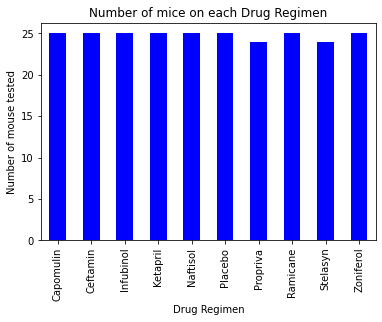

In [12]:
mice_data =  drug_regimen_group["Mouse ID"].nunique()
ax = mice_data.plot(kind="bar",title ="Number of mice on each Drug Regimen",facecolor="blue")
ax.set_ylabel("Number of mouse tested")

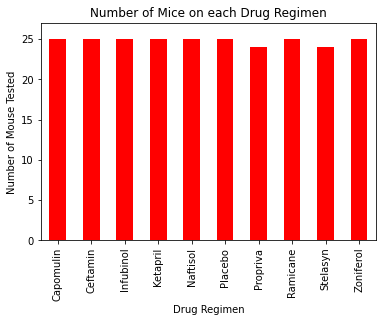

In [13]:
reg = drug_regimen_group["Mouse ID"].nunique()
x_axis = np.arange(0, len(reg))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Number of Mice on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse Tested")

plt.xlim(-0.5, len(mice_data)-0.5)
plt.ylim(0,mice_data.max() +2)

plt.bar(reg.index, reg, facecolor="red",align="center",width=0.5)
plt.xticks(tick_locations, reg.index,rotation="vertical")
plt.show()

In [14]:
grouped_by_sexes=clean_df.groupby("Sex").nunique()
grouped_by_sexes

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,123,10,24,14,10,800,5
Male,125,10,24,14,10,834,5


Male      125
Female    123
Name: Sex, dtype: int64

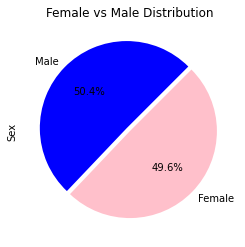

In [15]:
mouse_gender = clean_df[["Mouse ID", "Sex"]].drop_duplicates()

colors = ["blue","pink"]
explode=(0.05,0)

sex_distribution = mouse_gender["Sex"].value_counts()
sex_distribution.plot(kind="pie", title="Female vs Male Distribution", colors=colors, startangle=45, explode=explode, autopct='%1.1f%%')
sex_distribution

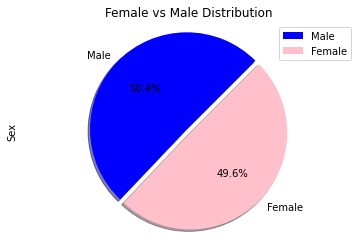

In [16]:
plt.pie(sex_distribution, labels=sex_distribution.index,colors=colors,autopct="%1.1f%%", shadow=True, startangle=45, explode=explode)
plt.axis("equal")
plt.title("Female vs Male Distribution")
plt.ylabel("Sex")
plt.legend(loc= "upper right")
plt.show()


In [17]:
filtered_drug_regimen_group=clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin") | (clean_df["Drug Regimen"]=="Ramicane") | (clean_df["Drug Regimen"]=="Infubinol") | (clean_df["Drug Regimen"]=="Ceftamin"),:]
treatments_for_each_mouse=filtered_drug_regimen_group.groupby("Mouse ID").sum()
treatments_for_each_mouse_df=pd.DataFrame({"Final Tumor Volume": treatments_for_each_mouse["Tumor Volume (mm3)"]})
treatments_for_each_mouse_df.index.name="Mouse ID"

timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
vol_df = pd.merge(clean_df, timepoint, how="inner", on=["Mouse ID", "Timepoint"]) 

treatments_for_each_mouse_df

,Final Tumor Volume
Mouse ID,
a203,563.127077
a251,552.370946
a275,527.709651
a411,407.013854
a444,430.600524
...,...
y769,562.908873
y793,385.068292
y865,549.985586


In [18]:
list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol = []

for drug in list_of_drugs:
    volume_df = vol_df.loc[vol_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df) 
quartiles = volume_df.quantile([0.25,0.5,0.75])

iqr = quartiles[0.75] - quartiles[0.25]

lower_bound = quartiles[0.25] - (1.5*iqr)
upper_bound = quartiles[0.75] + (1.5*iqr)

outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]

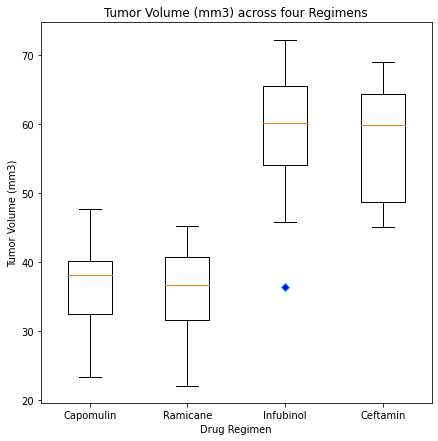

In [19]:
blue_dot = dict(markerfacecolor="b",marker="D", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.boxplot(tumor_vol, flierprops=blue_dot)
ax1.set_title("Tumor Volume (mm3) across four Regimens")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(list_of_drugs) + 1),ticklabels=list_of_drugs)

plt.show()

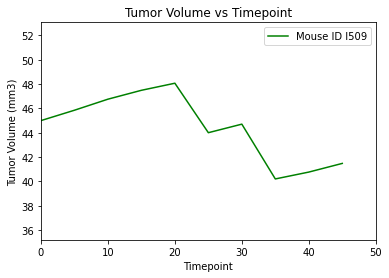

In [21]:
random_mouse = (clean_df[clean_df["Drug Regimen"]=="Capomulin"]).sample()
random_data = pd.merge(clean_df, random_mouse, on="Mouse ID", how="inner")
random_df = random_data.drop([col for col in random_data.columns if '_y' in col], axis=1)

time = random_df["Timepoint_x"]
vol = random_df["Tumor Volume (mm3)_x"]
label = random_df["Mouse ID"].unique()

line, = plt.plot(time, vol, 'g-')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.xlim(0, time.max() + 5)
plt.ylim(vol.min() - 5, vol.max() + 5)
plt.legend("Mouse ID " +label)
plt.show()

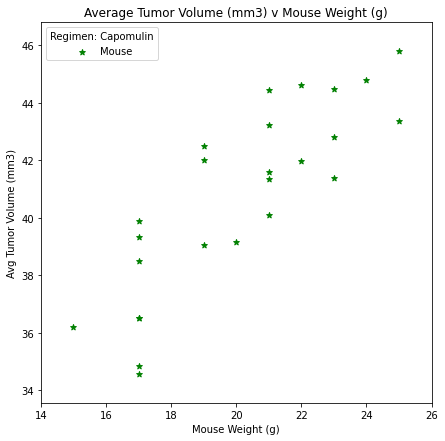

In [27]:
regimen = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
tvolume = regimen.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weight = regimen.groupby(["Mouse ID"])["Weight (g)"].mean()

mouse_vol_wt = pd.merge(tvolume,mouse_weight, on="Mouse ID", how="inner")
mouse_vol_wt = mouse_vol_wt.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})
vol = mouse_vol_wt.iloc[:,0]
wt = mouse_vol_wt.iloc[:,1]

fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="*", facecolors="green", edgecolors="green")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)

plt.show()

In [28]:
corr_coef = round(st.pearsonr(wt, vol)[0],2)
print(f"The correlation coefficient between Average Tumor Volume and Mouse Weight is {corr_coef}")


The correlation coefficient between Average Tumor Volume and Mouse Weight is 0.84


y = 0.95x + 21.55


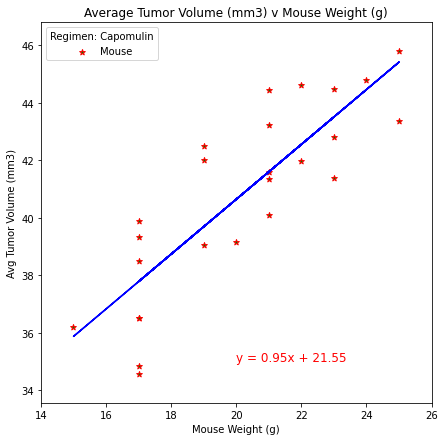

In [29]:
(slope, intercept, rvalue, pvalue, std_err) = st.linregress(wt, vol)

line = slope * wt + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
print(line_eq)

fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(wt, vol, marker="*", facecolors="green", edgecolors="red")
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")

plt.plot(wt, line, "b-")
plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(wt.min() - 1, wt.max() + 1)
plt.annotate(line_eq, (20,35), fontsize=12, color="red")
plt.show()